## Starting The Project

### preview of the datasets

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing2.csv')

# Show basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

### Step 1: EDA (Exploratory Data Analysis)

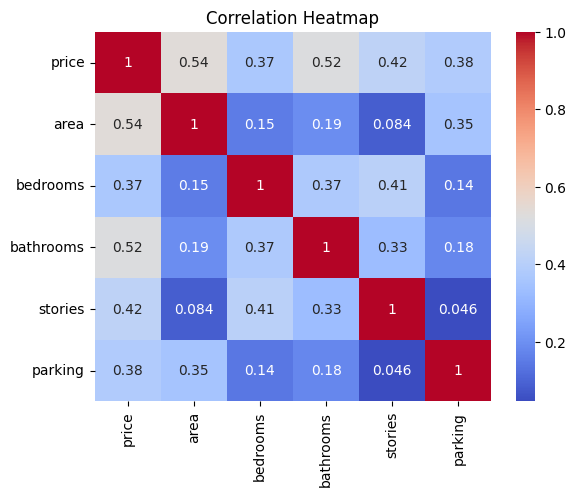

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation only on numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

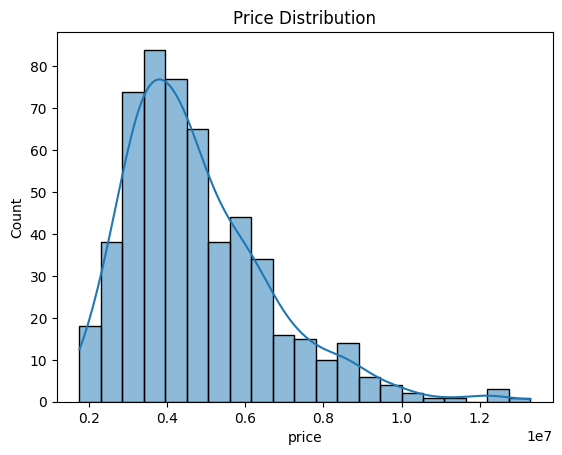

In [13]:
# Price distribution
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

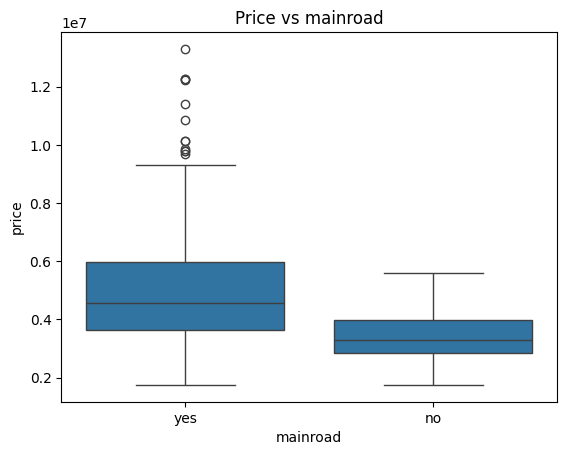

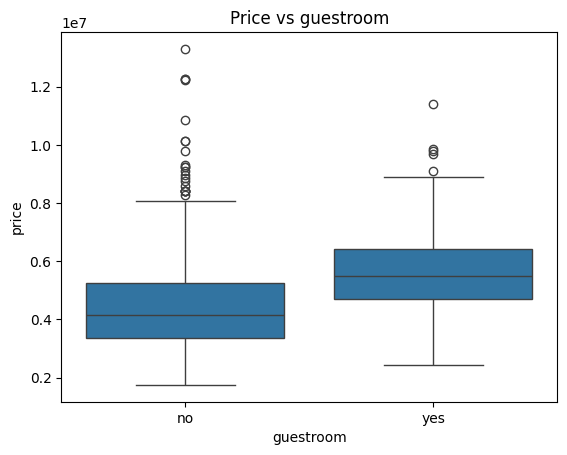

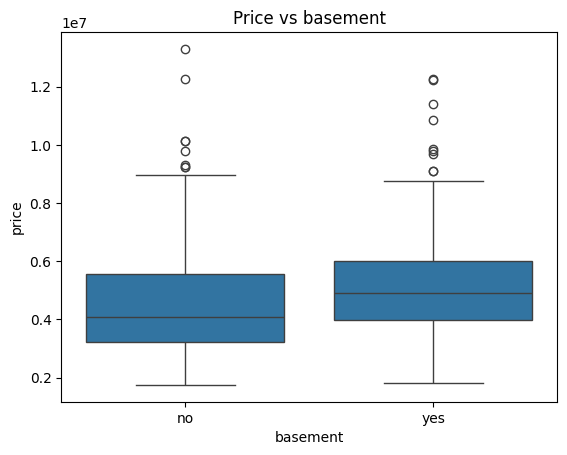

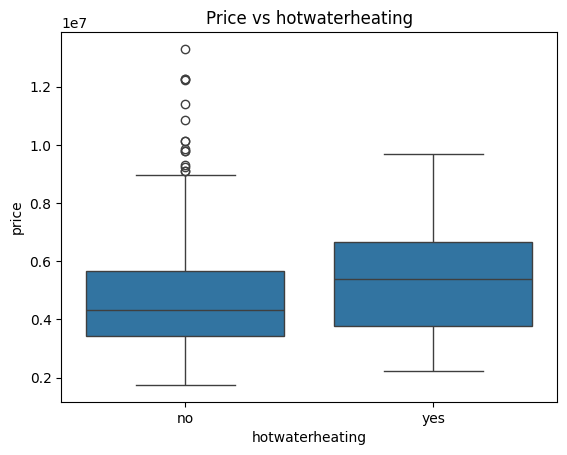

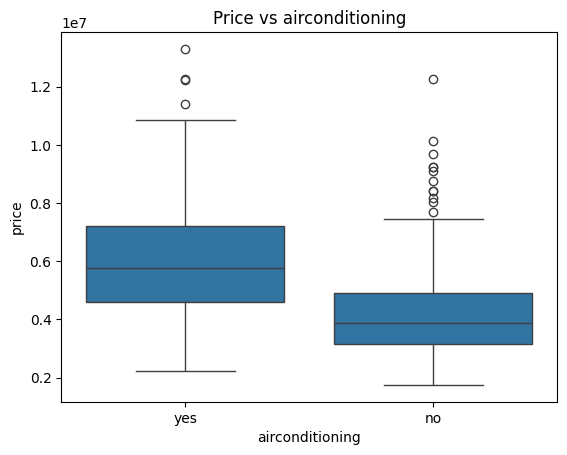

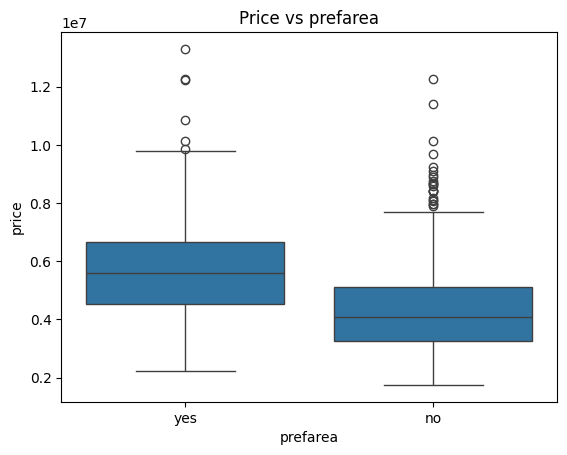

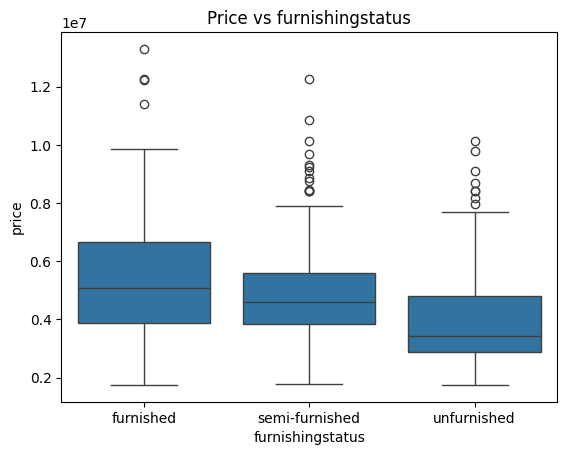

In [14]:
# Boxplots for categorical features
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
    plt.show()

### Step 2: Data Preprocessing & Feature Engineering

In [15]:
# Make a copy of the DataFrame to avoid changing the original
df_encoded = df.copy()

# Encode binary categorical columns (yes/no)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

# One-hot encode the 'furnishingstatus' column
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], drop_first=True)

# Confirm transformation
print(df_encoded.head())
print(df_encoded.dtypes)


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

### Step 3: Model Building & Evaluation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.2f}\n")

Linear Regression:
  RMSE: 1324506.96
  R² Score: 0.65

Random Forest:
  RMSE: 1400694.07
  R² Score: 0.61

Gradient Boosting:
  RMSE: 1299761.15
  R² Score: 0.67



### Step 4: Hyperparameter Tuning (Random Forest Example)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best model and params
print("✅ Best Parameters:", grid_search.best_params_)

# Evaluate best estimator on test data
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

print(f"🔍 Tuned Gradient Boosting - RMSE: {rmse:.2f}, R²: {r2:.2f}")

### Save the Trained Model & Scaler

In [ ]:
import joblib

# Save the best model and scaler
joblib.dump(best_model, 'gb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']